### Anderson Florez Jaramillo <br>

#  Produccion de  $CO_2$  en una plantación química

Se requiere determinar cuántos cilindros se necesitan para presurizar $600\: kg$ de $CO_2$, producido a altas presiones, para eso se dispone de la siguiente ecuación que determina el valor de la densidad del gas.


$$ R_gT\rho+ \left( B_0 R_g T-A_0- \frac{C_0}{T^{2}}\right) \rho^{2} + \left( b R_g T - a\right)  \rho^{3} + a \alpha \rho^{6} + \frac{c}{T^{2}} \rho^{3} \left( 1+ \gamma \rho^{2} \right)  e^{\left(   -\gamma \rho^{2} \right)   } -p = 0 $$

Conociendo todas las constantes y llamando a la incognita como $x$, la ecuación anterior se puede reescribir como

$$C_1x+C_2x^{2} + C_3 x^{3} + C_4 x^{6} + C_5 x^{3} \left( 1+ \gamma x^{2} \right)  e^{\left(   -\gamma x^{2} \right)   } -p = 0$$ <br>
Para conocer el valor de $x$ se desarrolla el siguiente algoritmo, conociendo la denisad del gas se puede estabelcer la masa en cada cilindro, sabiendo que cada cilindro tiene una capacidad de $0.33 \: m^3$ 

### Librerías Usadas


In [1]:
import numpy as np
from numpy import*
import pandas as pd
import math
import matplotlib.pyplot as plt

### Declaracion de  Constantes

In [2]:
T = 298                #Temperatura en Kelvin
P = 6398               #Presion en kPa
Mg = 44.1              #Masa molecular del gas en Kg/Kmol
Ru = 8.31447           #constante universal de los gases [kPa*m^3/kmol*K]
Rg = Ru/Mg
a = 1.625957e-4
b = 3.722481e-6
c = 17.725984
A0 = 0.143168
B0 = 1.134060e-3
C0 = 7248.770845
alfa = 9.936405e-10
gamma = 2.782826e-6

C1 = Rg*T
C2 = (B0*Rg*T-A0-(C0/T**2))
C3 = b*Rg*T-a
C4 = a*alfa
C5 = c/T**2


### Gráfica de la función $\rho$
Se grafica la función para estimar un posible valor semilla para resolver la ecuación por el método de Newton-Raphson

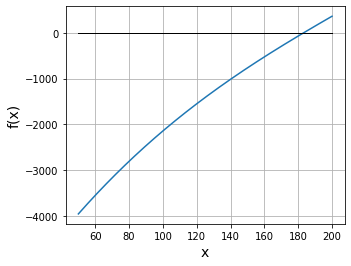

In [3]:
f = '(C1*x)+(C2*x**2)+(C3*x**3)+(C4*x**6)+(C5*x**3)*(1+gamma*x**2)*exp(-gamma*x**2)-P'


x_vector = linspace(50,200,300)
y_vector = zeros(len(x_vector))
for i in range(len(x_vector)):
    x = x_vector[i]
    y_vector[i] = eval(f)
    
eje_x = x_vector*0
plt.figure(figsize = (5,4))
plt.plot(x_vector,y_vector)
plt.plot(x_vector,eje_x,color = 'k',linewidth = 1)
plt.xlabel('x',fontsize = 14)
plt.ylabel('f(x)',fontsize = 14)
plt.grid()

### Ingresar Datos
se quiere diseñar un algoritmo interactivo que sea util y aplicable en diferentes problemas o circunstancias, por tal razon se pide al usuario el ingreso de  la tolerancia y el valor semilla para ejecutar el metodo de Newton Raphson.

In [4]:
x_0 = eval(input('ingrese el valor semilla que considere pertinente:  '))
tol = float(input('Ingrese una  tolerancia de error entre 0 y  1 : '))

ingrese el valor semilla que considere pertinente:  55
Ingrese una  tolerancia de error entre 0 y  1 : 0.00001


### Cuerpo del Programa

In [5]:
iter_max = 100             # Numero de iteraciones maximas

num_iter = 0               # inicializacion de iteraciones y del error
error = 1
if x_0 == 0:              #se contraresta un valor semilla igual a cero para evitar divisiones entre cero
    x_0 = 0.1
lista_err = []    # Lista vacía para almacenar los valores de error
lista_sol = []      #lista vacia para almacenar los valores de la solucion 
# Aplicacion del metodo de Newton Raphson.
while (num_iter <= iter_max and error > tol):
    x = x_0
    f_x0 = eval(f)
    x = x_0 + 0.001*x_0; f_x_mas_delta = eval(f)
    x = x_0 - 0.001*x_0; f_x_menos_delta = eval(f)
    derivada = (f_x_mas_delta-f_x_menos_delta)/((x_0 + 0.001*x_0)-(x_0 - 0.001*x_0))
    x = x_0                           
    x_0 = x_0 - (f_x0/derivada)
    masa = x*0.33
    lista_sol.append(masa)               #se guarda en la lista el nuevo valor de la solucion
    error = abs((x - x_0)/x)
    lista_err.append(error)             #Se guarda en la lista el nuevo valor de error
    num_iter = num_iter + 1
if (num_iter >= iter_max):
     print('Se alcanzó el número máximo de iteraciones sin hallar solución')
else:
    print('El valor de la densidad del gas es de : ',x,'Kg/m^3 ')
    print('El valor de la masa contenida en cada cilindro es de:  ',masa,' Kg \n')
    print('Durante la ejecución del programa: ')
    print('\t Se realizaron ',num_iter,' iteraciones')
    print('\t El error relativo aproximado obtenido fue: {:.2e}'.format(error))

El valor de la densidad del gas es de :  183.04838481264014 Kg/m^3 
El valor de la masa contenida en cada cilindro es de:   60.40596698817125  Kg 

Durante la ejecución del programa: 
	 Se realizaron  5  iteraciones
	 El error relativo aproximado obtenido fue: 2.68e-10


### Tabla de  Resultados 


In [6]:
v_err = np.array(lista_err)      # Conversión de lista a arreglo
v_sol = np.array(lista_sol)
v_its = np.arange(1,num_iter + 1)
Matriz_resultados = np.column_stack([v_its,v_sol,v_err])
Matriz_resultados
df = pd.DataFrame(data = Matriz_resultados,columns = ['Iteración', 'Masa Aproximada[Kg]', 'Error Relativo Apro'])
df.set_index('Iteración',inplace = True)
df

,Masa Aproximada[Kg],Error Relativo Apro
Iteración,,
1.0,18.150000,1.677121e+00
2.0,48.589740,2.278871e-01
3.0,59.662715,1.242293e-02
4.0,60.403901,3.420646e-05
5.0,60.405967,2.677746e-10


### Análisis de Resultados
Sabiendo la masa del gas que cabe en un cilindro, se puede determinar el número de cilindros necesarios para embotellar $600 Kg \:$ <br>

$$\frac{600 \: Kg}{60.4059} \approx 10 \; cilindros $$
<br>

A mayores presiones,la densidad del gas se incrementa, lo que posibilita la introduccionde de mas gas a cada cilindro, comparando con las condiciones normales, la densidad del gas es aproximadamente $2 Kg/m^3$, es decir, para las condiciones de la planta de $6398 \: kPa$ la densidad es casi 100 veces la densidad del gas a  condiciones normales. lo que incrementa la produccion de cilindros de gas con un mayor contenido, sin embargo, el hecho de que las presiones dentro del cilindro aumenten, implica una manufactura mas delicada y precisa de los cilindros, aumentando su resistencia para que pueda soportar sin problemas las presiones internas a las cuales seran sometidos.  